<center> <h1>Python Data Analysis Project</h1></center>

<center>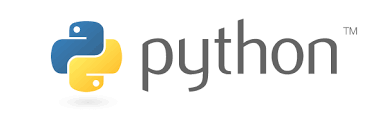</center>

<hr class="dotted">

# Load Data

In [142]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
pwd

'C:\\Users\\dror\\Documents\\Data Analyst\\tchBDA\\python'

In [144]:
# change this to the path you downloded the file
path = 'C:\\Users\\dror\\Documents\\Data Analyst\\tchBDA\\python'

In [145]:
# use pandas to read the csv
DB = pd.read_csv("%s/churn.csv" % path)
# show database
DB.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


We have 7043 examples and 21 columns (20 features\variables and one label).

#### Columns
 
Those the descriptions of the variables in this dataset:

<table>
    <tr><th> customerID </th><td> type should be integer </td></tr>
    <tr><th> gender </th><td> Gender </td></tr>
    <tr><th> seniorcitizen </th><td> 0-No 1-Yes </td></tr>
    <tr><th> partner </th><td> Yes/No </td></tr>
    <tr><th> dependents </th><td> Yes/No </td></tr>
    <tr><th> tenure </th><td> Number of subscribing months</td></tr>
    <tr><th> phoneservice </th><td> Yes/No </td></tr>
    <tr><th> multiplelines </th><td> No phone service/Yes/No  </td></tr>
    <tr><th> internetservice </th><td> No/DSL/Fiber optic  </td></tr>
    <tr><th> onlinesecurity </th><td> No internet service/Yes/No  </td></tr>
    <tr><th> onlinebackup </th><td> No internet service/Yes/No </td></tr>
    <tr><th> deviceprotection </th><td> No internet service/Yes/No </td></tr>
    <tr><th> techsupport </th><td> No internet service/Yes/No </td></tr>
    <tr><th> streamingtv </th><td> No internet service/Yes/No </td></tr>
    <tr><th> streamingmovies </th><td> No internet service/Yes/No </td></tr>
    <tr><th> contract </th><td> Month to month/One Year/Two Years </td></tr>
    <tr><th> paperlessbilling </th><td> Yes/No </td></tr>
    <tr><th> paymentmethod </th><td> Bank transfer (automatic)/Credit card (automatic)/Electronic check/Mailed check </td></tr>
    <tr><th> monthlycharges </th><td> </td></tr>
    <tr><th> totalcharges </th><td> </td></tr>
    <tr><th> churn </th><td> Yes/No</td></tr>
</table>

<hr class="dotted">

# Data Cleaning

Rename columns to lower letters

In [146]:
# lower columns name
DB= DB.rename(columns=str.lower)

Change to new customer id column as datatype int 

In [147]:
# insert new customer id as data types int 
DB.insert(0, 'customer_num', range(1,1 + len(DB)))
# drop old column 'customerid 
DB= DB.drop(['customerid'], axis=1)

Label to numeric

In [148]:
# change data type to int 
DB.partner = (DB.partner=='Yes').astype('int')
DB.dependents = (DB.dependents=='Yes').astype('int')
DB.phoneservice = (DB.phoneservice =='Yes').astype('int')
DB.paperlessbilling = (DB.paperlessbilling =='Yes').astype('int')
DB.churn = (DB.churn =='Yes').astype('int')
DB.head()

,customer_num,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,1,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,2,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,3,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,4,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,5,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


Check for missing values

In [149]:
# Missing values in Values
DB.isna().sum()

customer_num        0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

Check for unique values

In [150]:
DB.nunique()

customer_num        7043
gender                 2
seniorcitizen          2
partner                2
dependents             2
tenure                73
phoneservice           2
multiplelines          3
internetservice        3
onlinesecurity         3
onlinebackup           3
deviceprotection       3
techsupport            3
streamingtv            3
streamingmovies        3
contract               3
paperlessbilling       2
paymentmethod          4
monthlycharges      1585
totalcharges        6531
churn                  2
dtype: int64

In [151]:
DB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_num      7043 non-null   int64  
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   int32  
 4   dependents        7043 non-null   int32  
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   int32  
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   int32  


Convert 'totalcharges' column to float

In [152]:
s = DB['totalcharges'].replace(' ','0')
f = []
for item in s:
    f.append(float(item))
DB['total_charges'] = f
DB = DB.drop(['totalcharges'], axis=1)

Categorical values to 1-hot

In [153]:
# convert 'No internet service' & 'No phone service' to 'No'
DB['multiplelines'] = DB['multiplelines'].replace('No phone service','No')
DB['onlinesecurity'] = DB['onlinesecurity'].replace('No internet service','No')
DB['onlinebackup'] = DB['onlinebackup'].replace('No internet service','No')
DB['deviceprotection'] = DB['deviceprotection'].replace('No internet service','No')
DB['techsupport'] = DB['techsupport'].replace('No internet service','No')
DB['streamingtv'] = DB['streamingtv'].replace('No internet service','No')
DB['streamingmovies'] = DB['streamingmovies'].replace('No internet service','No')
# change data type to int 
DB['multiplelines'] = (DB.multiplelines=='Yes').astype('int')
DB['onlinesecurity'] = (DB.onlinesecurity=='Yes').astype('int')
DB['onlinebackup'] = (DB.onlinebackup=='Yes').astype('int')
DB['deviceprotection'] = (DB.deviceprotection=='Yes').astype('int')
DB['techsupport'] = (DB.techsupport=='Yes').astype('int')
DB['streamingtv'] = (DB.streamingtv=='Yes').astype('int')
DB['streamingmovies'] = (DB.streamingmovies=='Yes').astype('int')
DB.head()

,customer_num,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,churn,total_charges
0,1,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,0,29.85
1,2,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,0,1889.50
2,3,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,1,108.15
3,4,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,0,1840.75
4,5,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,1,151.65


Check all values are indeed numeric

In [154]:
DB.dtypes

customer_num          int64
gender               object
seniorcitizen         int64
partner               int32
dependents            int32
tenure                int64
phoneservice          int32
multiplelines         int32
internetservice      object
onlinesecurity        int32
onlinebackup          int32
deviceprotection      int32
techsupport           int32
streamingtv           int32
streamingmovies       int32
contract             object
paperlessbilling      int32
paymentmethod        object
monthlycharges      float64
churn                 int32
total_charges       float64
dtype: object

<br>
<br>
<hr class="dotted">
<br>
<br>

# Finding interesting relationships

### Total subscribers and churn
 
First, lets check how many subscribers are on the database and how many of them left

In [155]:
Tot_Subs = len(DB)
Churn = sum(DB['churn'])
print("We have %d total subscribers and %d of them have left (%f%%)" % (Tot_Subs, Churn, (Churn/Tot_Subs*100)))

We have 7043 total subscribers and 1869 of them have left (26.536987%)


In [156]:
mpl.rcParams['figure.figsize'] = [8.0, 6.0]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100
mpl.rcParams['figure.facecolor']='white'
mpl.rcParams['font.size'] = 12
mpl.rcParams['text.color'] = 'black'
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['xtick.color'] = 'black'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['figure.titlesize'] = 'small'
mpl.rcParams["figure.figsize"] = [10, 10]
mpl.style.use('bmh')

Text(0.5, 1.0, 'Tenure & Churn Subscribers')

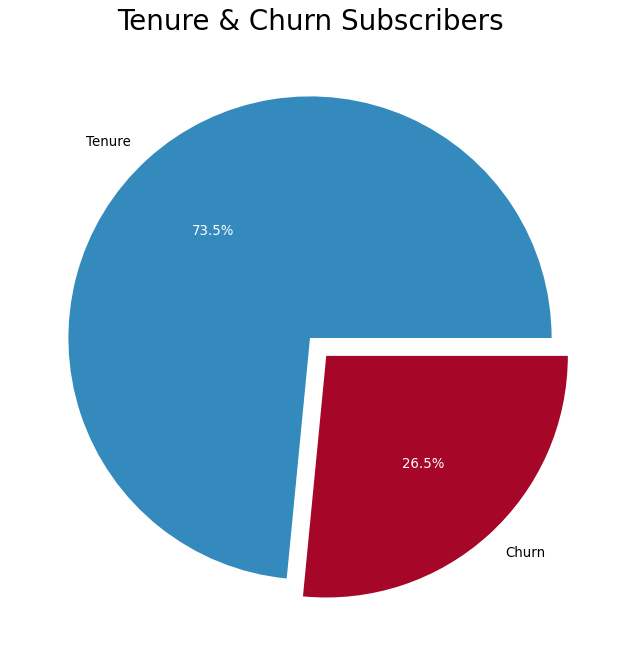

In [157]:
c = DB.churn.value_counts(normalize=True)
labels = 'Tenure', 'Churn' 

explode = (0,0.1)
fig, ax = plt.subplots()
_, _, autotexts = ax.pie(c, explode=explode, labels=labels, autopct='%1.1f%%', startangle=0)

for autotext in autotexts:
    autotext.set_color('white')  
ax.set_title('Tenure & Churn Subscribers', fontsize=25)

#### about 26 % subscribers are churned

What are the statistics of the data?

In [158]:
DB.describe()

,customer_num,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,monthlycharges,churn,total_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3522.000000,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,0.265370,2279.734304
std,2033.283305,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,0.441561,2266.794470
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,1761.500000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,0.000000,398.550000
50%,3522.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,0.000000,1394.550000
75%,5282.500000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,1.000000,3786.600000
max,7043.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,1.000000,8684.800000


* Looking at the tenure column, we can see that the average is 32 month, that the max is 72 month and that 75% of the customers are 55 months tenure.
* Looking at the phoneservice column we can see that 90% of the customers use this service.
* Looking at the internetservice columns we can see that 34% use DSL and 43% use Fiber, Toatl ibternet service 77%.

<AxesSubplot:>

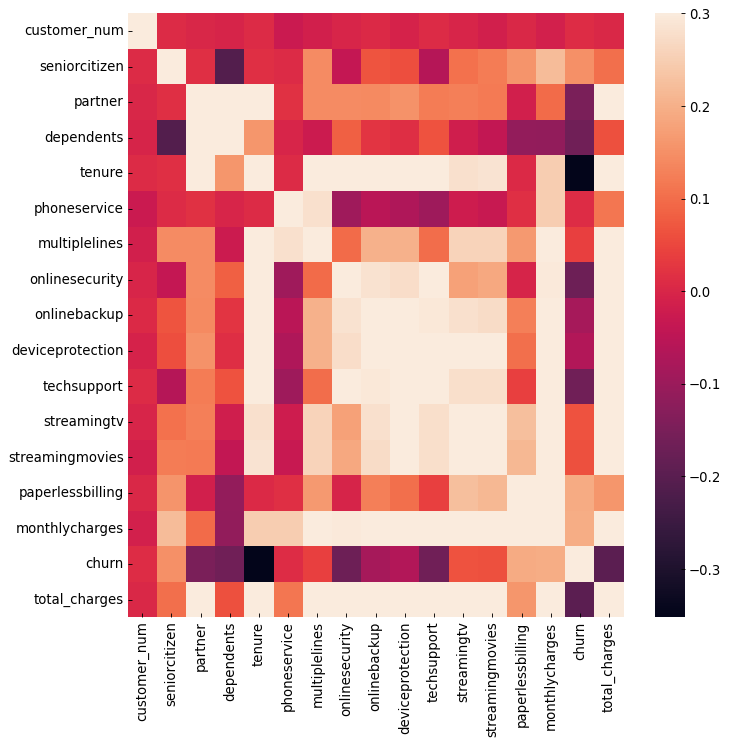

In [159]:
sns.heatmap(DB.corr(), vmax=.3)

<AxesSubplot:>

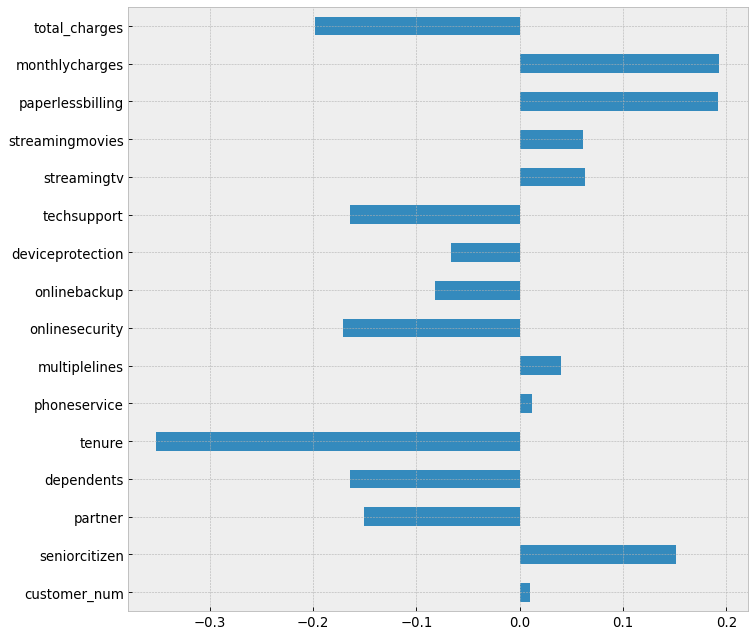

In [160]:
DB.corr()['churn'].drop('churn').plot(kind='barh')

<b>Some variables indeed have strong correlations, let's deep dive into tenure.</b>

<hr class="dotted">

# Tenure distribution and Churn

Plot the Tenture frequencies of the subscribers


Monthly charge distribution and Churn
- New Customer below 6 months
- Avg 7-35 months
- Vetetan 36-65 months
- Most Veneran Over 66 months

In [161]:
DB['tenure_group'] = None
DB.loc[(DB['tenure'] <= 6),'tenure_group'] = '0-6 Months'
DB.loc[(DB['tenure'] >=7) &(DB['tenure'] < 36),'tenure_group'] = '35-7 Months'
DB.loc[(DB['tenure'] >=36) & (DB['tenure'] < 66.),'tenure_group'] = '36-65 Months'
DB.loc[(DB['tenure'] >=66),'tenure_group'] = 'Over 66 Months'
DB

,customer_num,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,churn,total_charges,tenure_group
0,1,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,0,29.85,0-6 Months
1,2,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,0,1889.50,35-7 Months
2,3,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,1,108.15,0-6 Months
3,4,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,0,1840.75,36-65 Months
4,5,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,1,151.65,0-6 Months
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7039,Male,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,0,1990.50,35-7 Months
7039,7040,Female,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,0,7362.90,Over 66 Months
7040,7041,Female,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,0,346.45,35-7 Months
7041,7042,Male,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,1,306.60,0-6 Months


In [162]:
DB.groupby('tenure_group').agg({'churn':['count',sum,'mean']})

churn               
               count  sum      mean
tenure_group                       
0-6 Months      1481  784  0.529372
35-7 Months     2511  717  0.285544
36-65 Months    2018  305  0.151140
Over 66 Months  1033   63  0.060987

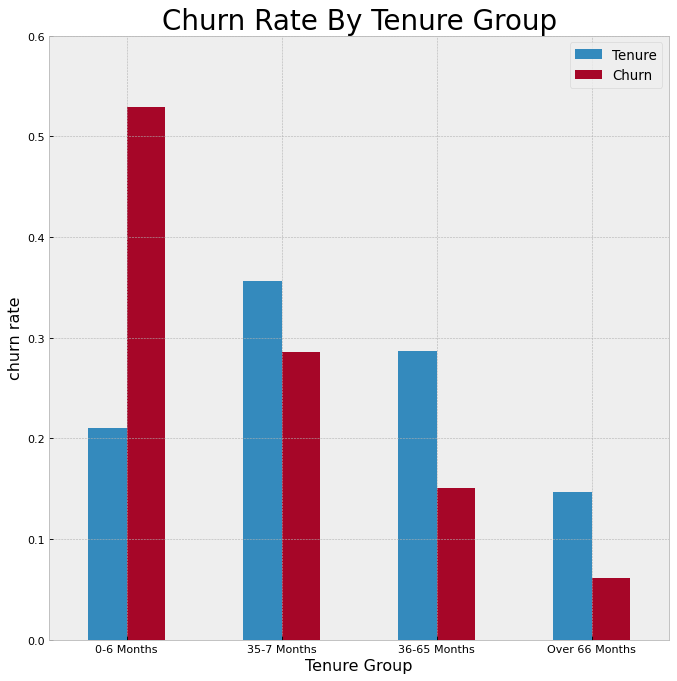

In [163]:
Tenure_Group_distribution = DB.tenure_group.value_counts(normalize=True).sort_index()
churn_by_Tenure_Group_rates = DB.groupby('tenure_group').churn.mean()
Tenure_Group_stats = pd.DataFrame({'Tenure_Group_dist':Tenure_Group_distribution, 'churn_rate':churn_by_Tenure_Group_rates})
labels = ('Tenure', 'Churn')
Tenure_Group_stats.plot(kind='bar')
plt.xlabel('Tenure Group')
plt.xticks(rotation = 0 ,fontsize=10)
plt.yticks(rotation = 0 ,fontsize=10)
plt.ylabel('churn rate')
plt.ylim(0, 0.6)
plt.title('Churn Rate By Tenure Group',fontsize=25)
plt.legend(['Tenure','Churn'])

#### we can see that majority of the customers are New Customers and majority of the churned are within this group

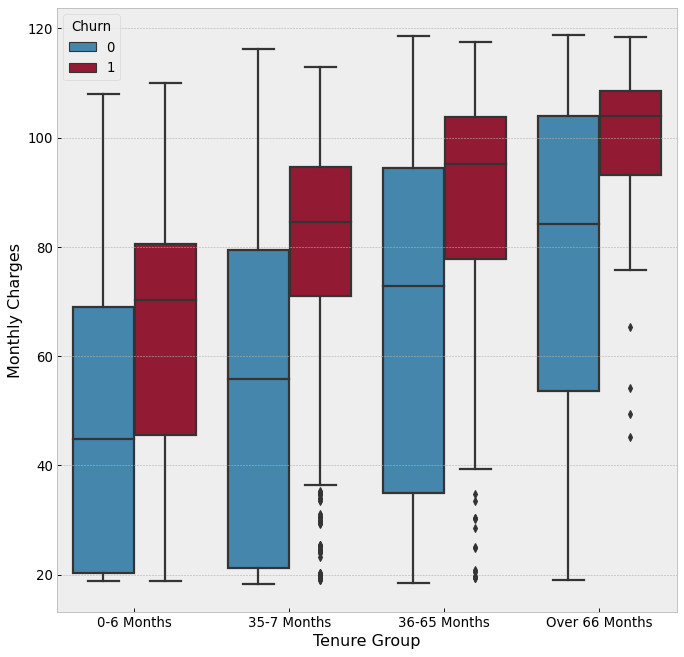

In [164]:
sns.boxplot(x="tenure_group" ,y="monthlycharges",hue="churn",data=DB)
plt.legend(['Tenure','Churn'], loc='upper left' )
plt.ylabel('Monthly Charges')
plt.xticks(rotation = 0)
plt.yticks(rotation = 0)
plt.xlabel('Tenure Group')
plt.legend(title='Churn' ,loc='upper left' )

<hr class="dotted">

# Monthly Charges and Churn

<AxesSubplot:xlabel='monthlycharges', ylabel='Count'>

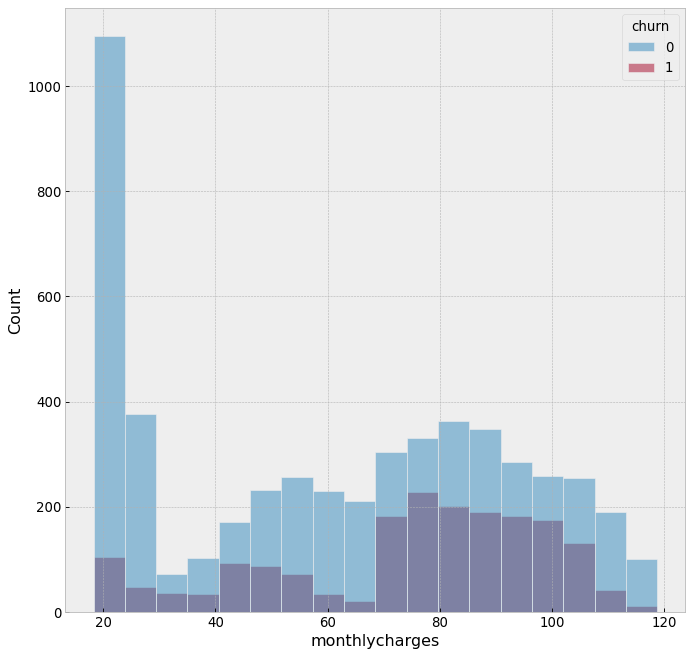

In [165]:
sns.histplot(data=DB, x="monthlycharges", hue="churn")

#### Monthly charge distribution and Churn
- Extremely High: above 100
- High: 70-100
- Medium: 30- 69
- Low: below 30

In [166]:
# create the categorical variables called "PriceGroup"
DB['pricegroup'] = None
DB.loc[(DB['monthlycharges'] < 30),'pricegroup'] = 'Low'
DB.loc[(DB['monthlycharges'] >=30) & (DB['monthlycharges'] < 70.),'pricegroup'] = 'Medium'
DB.loc[(DB['monthlycharges'] >=70) &(DB['monthlycharges'] <= 100),'pricegroup'] = 'High'
DB.loc[(DB['monthlycharges'] > 100),'pricegroup'] = 'Extremely High'

In [167]:
DB.groupby('pricegroup').agg({'churn':['count',sum,'mean']})

churn                
               count   sum      mean
pricegroup                          
Extremely High   902   253  0.280488
High            2689  1021  0.379695
Low             1653   162  0.098004
Medium          1799   433  0.240689

#### we can see that the "High" group is with the largest chance to churn (37.9%) and the "Extremely High" group 28% almost in the same chances to churn as the "Medium" group 24%.

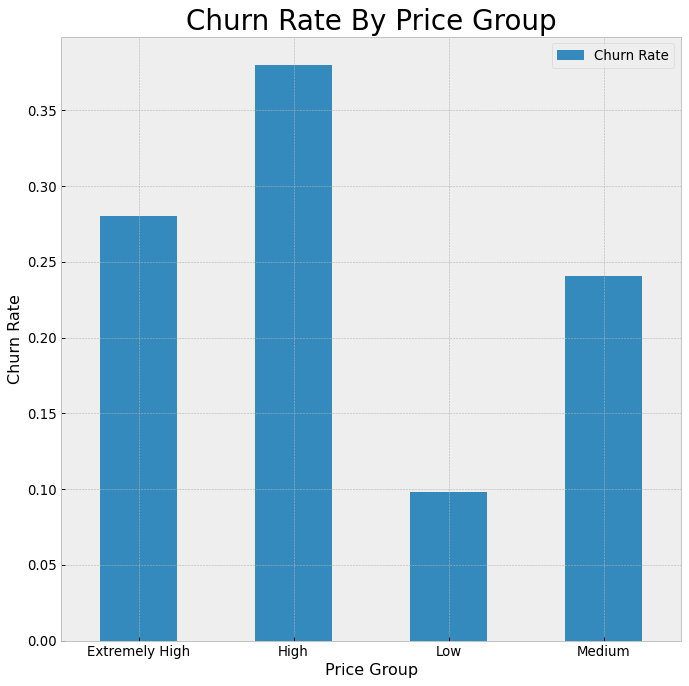

In [168]:
DB.groupby('pricegroup').agg({'churn':['mean']}).plot(kind='bar')
plt.xlabel('Price Group')
plt.xticks(rotation = 0)
plt.yticks(rotation = 0 )
plt.ylabel('Churn Rate')
plt.title('Churn Rate By Price Group',fontsize=25)
plt.legend(['Churn Rate'])

### Customer churn average monthly charges are lower from customers average price 

<hr class="dotted">

## Total Charges and Churn

<AxesSubplot:xlabel='total_charges', ylabel='Count'>

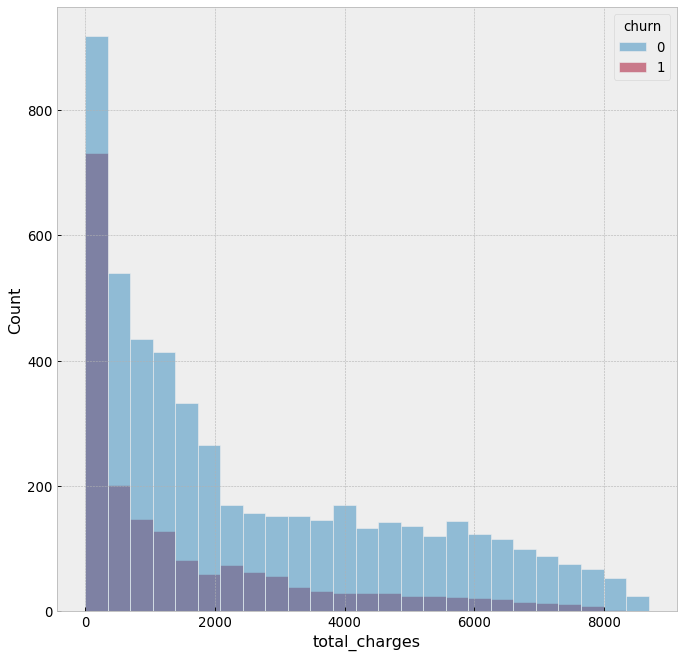

In [169]:
sns.histplot(data=DB, x="total_charges", hue="churn")

In [170]:
# create the categorical variables called "TotalPriceGroup"
DB['Totalpricegroup'] = None
DB.loc[(DB['total_charges'] < 500),'Totalpricegroup'] = 'Low'
DB.loc[(DB['total_charges'] >=500) & (DB['total_charges'] < 2000.),'Totalpricegroup'] = 'Medium'
DB.loc[(DB['total_charges'] >=2000) &(DB['total_charges'] <= 4000),'Totalpricegroup'] = 'High'
DB.loc[(DB['total_charges'] > 4000),'Totalpricegroup'] = 'Extremely High'

In [171]:
DB.groupby('Totalpricegroup').agg({'churn':['mean']})

,churn
,mean
Totalpricegroup,
Extremely High,0.147451
High,0.237583
Low,0.412233
Medium,0.234375


### churn Rate is 45% for under 500 Toatl Charges, we need to examine the Contract Length

<hr class="dotted">

# Contract length and Churn

In [172]:
DB.groupby('contract').agg({'churn':['mean']})

,churn
,mean
contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


### Strong correlation. "Month to Month" contract are with the largest chances of churn - 42.7%

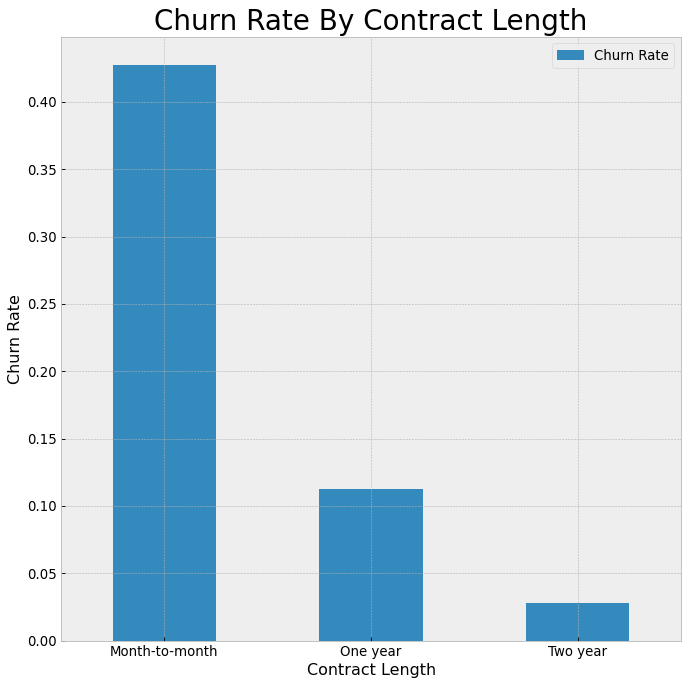

In [173]:
DB.groupby('contract').agg({'churn':['mean']}).plot(kind='bar')
plt.xlabel('Contract Length')
plt.xticks(rotation = 0)
plt.yticks(rotation = 0)
plt.ylabel('Churn Rate')
plt.title('Churn Rate By Contract Length',fontsize=25)
plt.legend(['Churn Rate'])

<hr class="dotted">

# Phone Service And Churn

In [174]:
DB.groupby('phoneservice').agg({'churn':['count',sum,'mean']})

churn                
             count   sum      mean
phoneservice                      
0              682   170  0.249267
1             6361  1699  0.267096

### Phone Service are with 26.7 % chances of churn 

<hr class="dotted">

# Multiplelines and  Churn

### Multiplelines is a extra product service for Phone Service customers

In [175]:
DB.groupby('multiplelines').agg({'churn':['count',sum,'mean']})

churn                
              count   sum      mean
multiplelines                      
0              4072  1019  0.250246
1              2971   850  0.286099

### we can see that phone service with multiplelines have a 28.6% rate churn

<hr class="dotted">

# Internet Service And Churn

In [176]:
DB.groupby('internetservice').agg({'churn':['count',sum,'mean']})

churn                
                count   sum      mean
internetservice                      
DSL              2421   459  0.189591
Fiber optic      3096  1297  0.418928
No               1526   113  0.074050

#### Strong correlation. Fiber optic are with 41.8 % chances of churn 

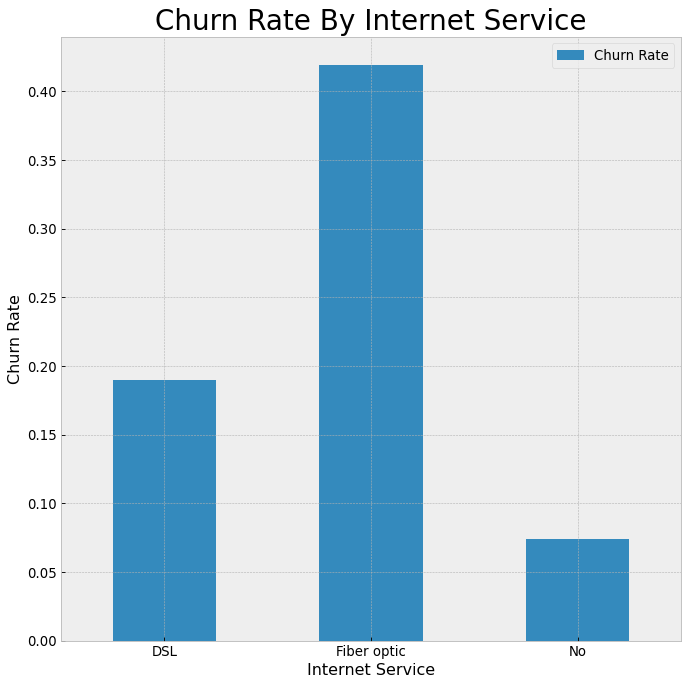

In [177]:
DB.groupby('internetservice').agg({'churn':['mean']}).plot(kind='bar')
plt.xticks(rotation = 0)
plt.ylabel('Churn Rate')
plt.xlabel('Internet Service')
plt.title('Churn Rate By Internet Service',fontsize=25)
plt.legend(['Churn Rate'])

#### we see that the majority of churned subcribers is in "Fiber optic"

<hr class="dotted">

### Fiber Optic have 4 support services and 2 Streaming Products options:</br>
* "Online security", "Online Backup", "Device Protection" and "Tech Support"
* "Streaming TV" and "Streaming Movie"

let's see if one of them effects on churn rates

In [178]:
FO = DB[['internetservice','onlinesecurity','onlinebackup','deviceprotection','techsupport','streamingtv','streamingmovies','churn']]
FO = FO.loc[(FO['internetservice'] == 'Fiber optic')]

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'onlinesecurity'),
  Text(1.5, 0, 'onlinebackup'),
  Text(2.5, 0, 'deviceprotection'),
  Text(3.5, 0, 'techsupport'),
  Text(4.5, 0, 'streamingtv'),
  Text(5.5, 0, 'streamingmovies'),
  Text(6.5, 0, 'churn')])

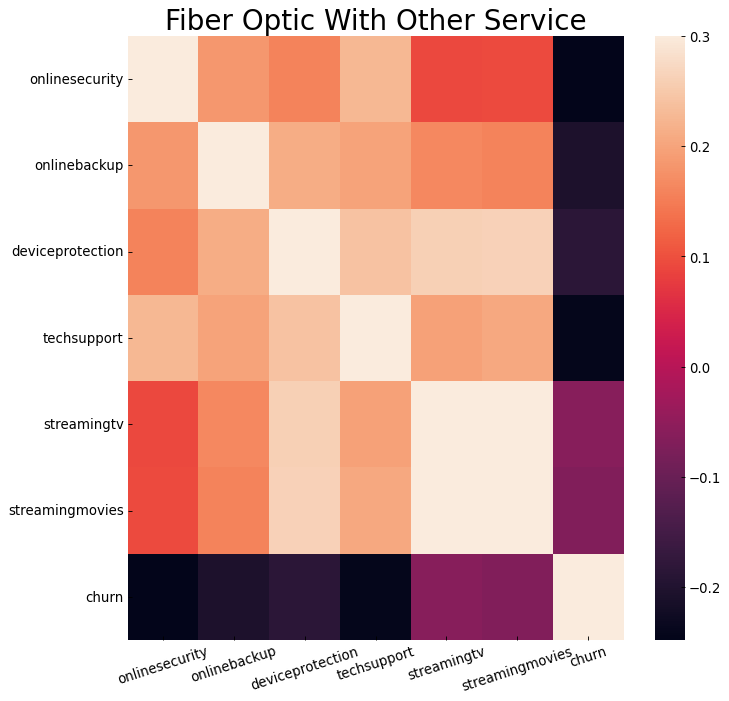

In [179]:
sns.heatmap(FO.corr(), vmax=.3)
plt.title('Fiber Optic With Other Service',fontsize=25)
plt.xticks(rotation = 18)

## we see that "Fiber Optic" with others services are with lower rate of churned subscribers

Let examine customers by type of additional service and none service

In [180]:
FO = FO.groupby(['onlinesecurity','onlinebackup','deviceprotection','techsupport']).agg({'churn':['count',sum,'mean']})
FO = FO.reset_index()
FO['Service Packages'] = ['None',
                          'Tech Support',
                          'Device Protection',
                          'Tech Support & Device Protection',
                          'Online Backup',
                          'Online Backup & Tech Support',
                          'Online Backup & Device Protection',
                          'Online Backup &  Device Protection & Tech Support',
                          'Online Security',
                          'Online Security & Tech Support',
                          'Online Security & Device Protection',
                          'Online Security & Device Protection & Tech Support',
                          'Online Security & Online Backup',
                          'Online Security & Online Backup & Tech Support',
                          'Online Security & Online Backup & Device Protection',
                          'Online Security & Online Backup & Device Protection & Tech Support']
FO = FO.drop(['onlinesecurity','onlinebackup','deviceprotection','techsupport'], axis=1 )
FO = FO.set_index('Service Packages')
FO['count'] = FO['churn','count']
FO['sum'] = FO['churn','sum']
FO['mean'] = FO['churn','mean']
FO = FO.drop(['churn'], axis=1)
FO.sort_values(by=['mean'])

C:\Users\dror\anaconda3\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,count,sum,mean
,,,
Service Packages,,,
Online Security & Online Backup & Device Protection & Tech Support,191,16,0.083770
Online Security & Online Backup & Tech Support,68,12,0.176471
Online Security & Online Backup & Device Protection,122,22,0.180328
Online Security & Device Protection & Tech Support,75,14,0.186667
Online Backup & Device Protection & Tech Support,151,34,0.225166
Online Backup & Tech Support,102,24,0.235294
Online Security & Online Backup,108,26,0.240741
Online Security & Tech Support,40,11,0.275000


## YES! 
we see that 63.5% of churned subscribers in "Fiber Optic" service are with NO support 

### categorical Internet Service

In [181]:
# create the categorical variables called "Internet Service"
DB['Internet Service'] = None
DB.loc[(DB['onlinesecurity'] == 1) & (DB['onlinebackup'] == 1) & 
       (DB['deviceprotection'] == 1) & (DB['techsupport'] == 1),
       'Internet Service'] = 'All 4 Service'
DB.loc[(DB['onlinesecurity'] == 0) & (DB['onlinebackup'] == 0) & 
       (DB['deviceprotection'] == 0) & (DB['techsupport'] == 0),
       'Internet Service'] = 'None'
DB.loc[(DB['Internet Service'].isna()), 'Internet Service'] = '1-3 Service'

### examine churn rate for "Fiber Optic" additional service and none service for all "Month to Month" contract

In [182]:
FO = DB.loc[(DB['internetservice'] == 'Fiber optic') & (DB['contract'] == 'Month-to-month')]
FO.groupby('Internet Service').agg({'churn':['mean']})

,churn
,mean
Internet Service,
1-3 Service,0.482625
All 4 Service,0.315789
None,0.652334


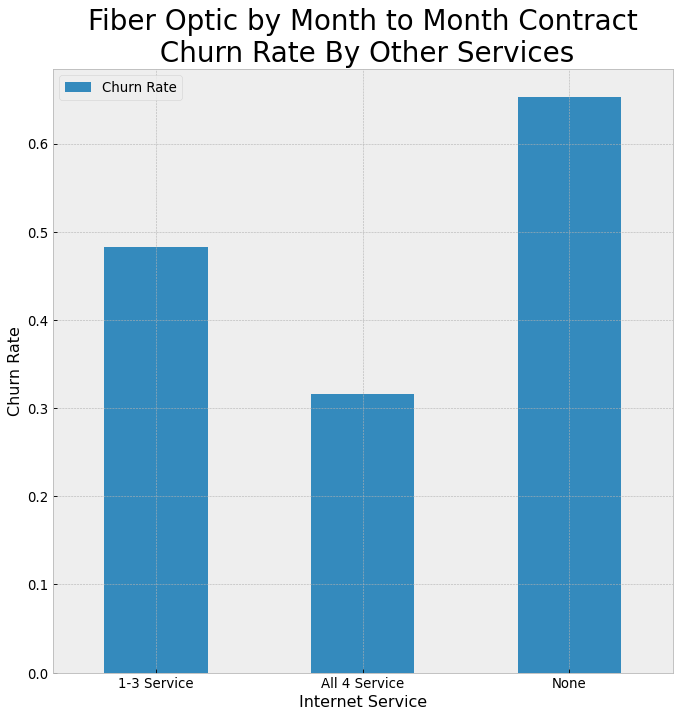

In [183]:
FO.groupby('Internet Service').agg({'churn':['mean']}).plot(kind='bar')
plt.xticks(rotation = 0)
plt.ylabel('Churn Rate')
plt.xlabel('Internet Service')
plt.title('Fiber Optic by Month to Month Contract\n Churn Rate By Other Services',fontsize=25)
plt.legend(['Churn Rate'])

## "Fiber Optic" with "Month to Month" contract have high churn rate for all servise

examine churn rate for "Fiber Optic" additional service and none service by "price group"

In [184]:
FO.groupby('Internet Service').agg({'churn':['count',sum,'mean']})

churn               
                 count  sum      mean
Internet Service                     
1-3 Service       1295  625  0.482625
All 4 Service       19    6  0.315789
None               814  531  0.652334

In [185]:
FO.groupby('pricegroup').agg({'churn':['count',sum,'mean']})

churn               
               count  sum      mean
pricegroup                         
Extremely High   324  162  0.500000
High            1700  936  0.550588
Medium           104   64  0.615385

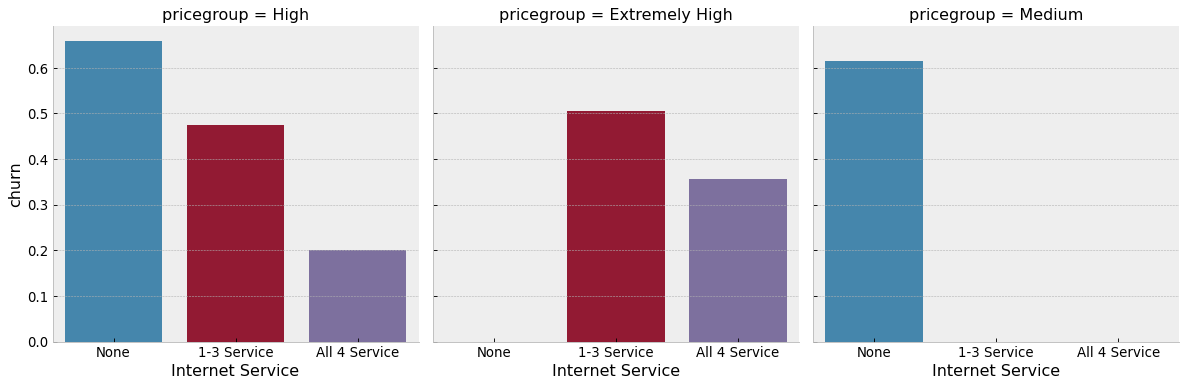

In [186]:
sns.catplot(x="Internet Service", y="churn",col="pricegroup",kind="bar",ci=None,data=FO)

### Medium price group
* "Fiber Optic" in Medium price group have 61.5% churn rate for none extra service

###  High price group
* "Fiber Optic" in High price group have over 65% churn rate for none extra service

### Extremely High price group
* "Fiber Optic" in Extremely High price group have over 50% churn rate for 1-3 service
* for All 4 Service 35%

### examine churn rate for "DSL" additional service and none service

In [187]:
DS = DB.loc[(DB['internetservice'] == 'DSL')]
DS.groupby('Internet Service').agg({'churn':['mean']})

,churn
,mean
Internet Service,
1-3 Service,0.157284
All 4 Service,0.032258
None,0.427208


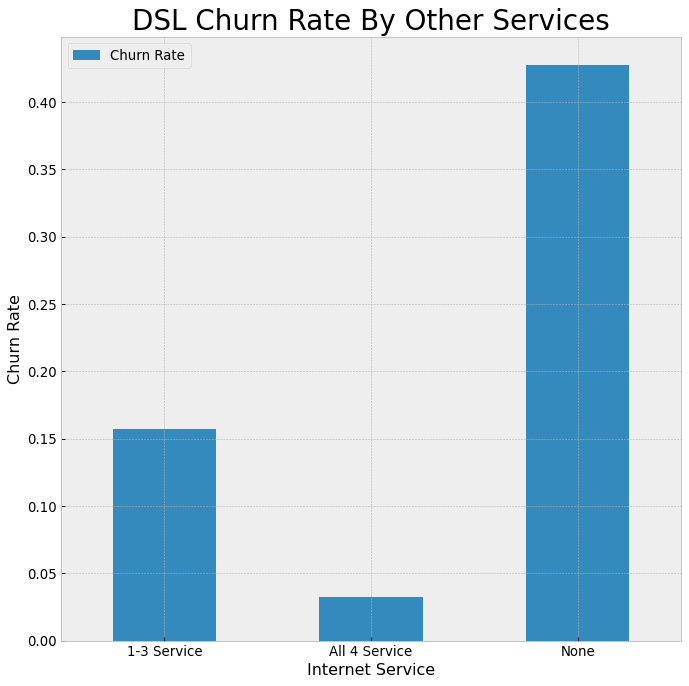

In [188]:
DS.groupby('Internet Service').agg({'churn':['mean']}).plot(kind='bar')
plt.xticks(rotation = 0)
plt.ylabel('Churn Rate')
plt.xlabel('Internet Service')
plt.title('DSL Churn Rate By Other Services',fontsize=25)
plt.legend(['Churn Rate'])

#### 42% churn rate for DSL with none other service

_____________________

# Senior Citizen, Partner and dependents Churn Rate

SeniorCitizen and Churn
Strong correlation. SeniorCitizen are with larger churn

In [189]:
DB.groupby('seniorcitizen').agg({'churn':['count',sum,'mean']})

churn                
              count   sum      mean
seniorcitizen                      
0              5901  1393  0.236062
1              1142   476  0.416813

Partner

In [190]:
DB.groupby('partner').agg({'churn':['count',sum,'mean']})

churn                
        count   sum      mean
partner                      
0        3641  1200  0.329580
1        3402   669  0.196649

Dependents

In [191]:
DB.groupby('dependents').agg({'churn':['count',sum,'mean']})

churn                
           count   sum      mean
dependents                      
0           4933  1543  0.312791
1           2110   326  0.154502

### Senior Citizens are with larger churn rate- 41.6%

## Senior Citizens with "Fiber Optic" and other service 

In [192]:
FOSC=DB.loc[(DB['internetservice']== 'Fiber optic')&(DB['seniorcitizen'] ==1)]
FOSC.groupby(['Internet Service']).agg({'churn':['count',sum,'mean']})

churn               
                 count  sum      mean
Internet Service                     
1-3 Service        537  225  0.418994
All 4 Service       36    1  0.027778
None               258  167  0.647287

64.7 % churn rate - with None extra services

In [193]:
# create the categorical variables called "Customer Type"
DB['Customer Type'] = 'None'
DB.loc[(DB['seniorcitizen'] == 1), 'Customer Type'] = 'Senior Citizens'
DB.loc[(DB['partner'] == 1), 'Customer Type'] = 'Partner'
DB.loc[(DB['dependents'] == 1), 'Customer Type'] = 'Dependents'

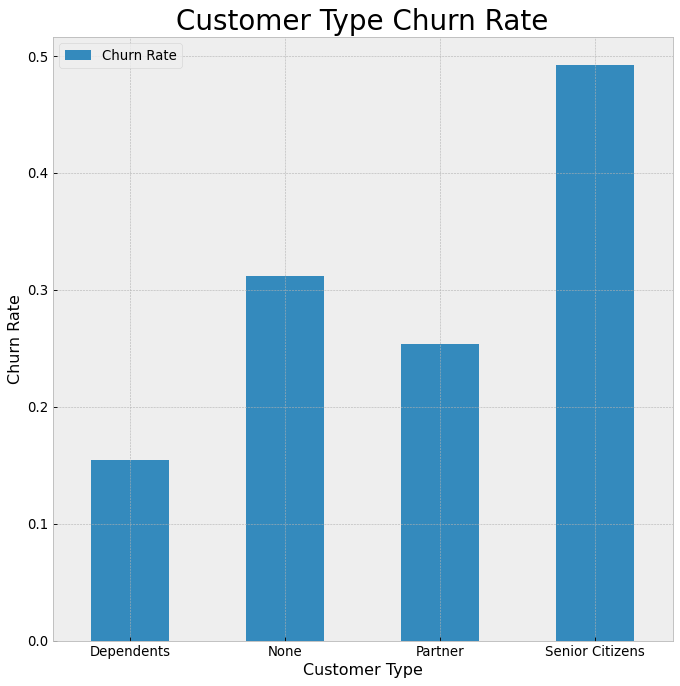

In [194]:
DB.groupby('Customer Type').agg({'churn':['mean']}).plot(kind='bar')
plt.xticks(rotation = 0)
plt.ylabel('Churn Rate')
plt.xlabel('Customer Type')
plt.title('Customer Type Churn Rate',fontsize=25)
plt.legend(['Churn Rate'])

______________________________________

# paperless billing

In [195]:
DB.groupby('paperlessbilling').agg({'churn':['count',sum,'mean']})

churn                
                 count   sum      mean
paperlessbilling                      
0                 2872   469  0.163301
1                 4171  1400  0.335651

### Majority of the churned subscribers is within paperless billing with 33.5% 

<hr class="dotted">

# Payment Method Churn Rate

there are 4 Payment Method:

In [196]:
DB.groupby('paymentmethod').agg({'churn':['count',sum,'mean']})

churn                
                          count   sum      mean
paymentmethod                                  
Bank transfer (automatic)  1544   258  0.167098
Credit card (automatic)    1522   232  0.152431
Electronic check           2365  1071  0.452854
Mailed check               1612   308  0.191067

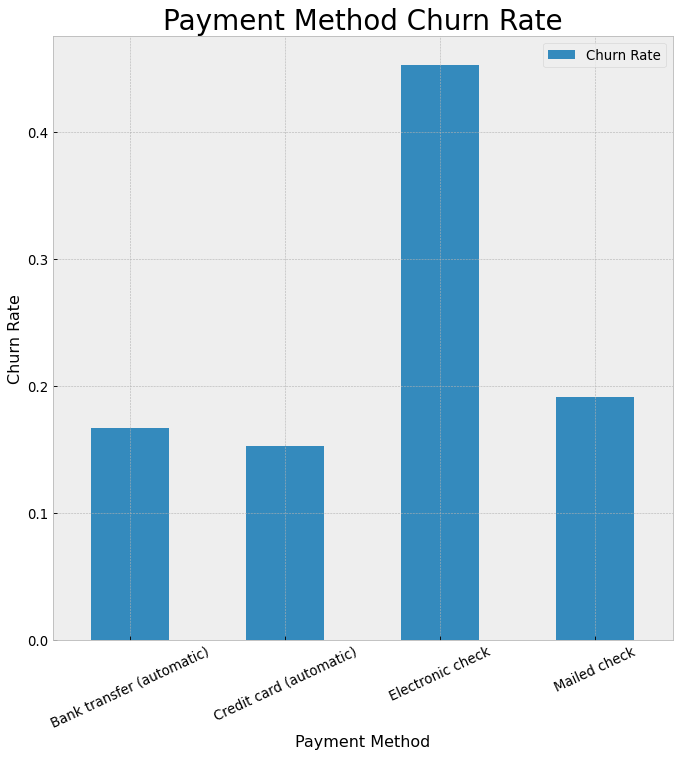

In [197]:
DB.groupby('paymentmethod').agg({'churn':['mean']}).plot(kind='bar')
plt.xticks(rotation = 25)
plt.ylabel('Churn Rate')
plt.xlabel('Payment Method')
plt.title('Payment Method Churn Rate',fontsize=25)
plt.legend(['Churn Rate'])

## Electronic check with the highst churne rate - 45.2%

<hr class="dotted">

# More Data Visualization

### Churned subcribers By Tenure & Monthly Charges

Text(44.08308738425926, 0.5, 'Monthly Charges')

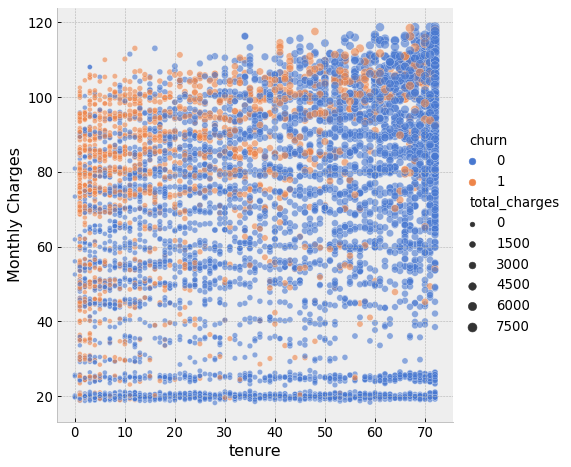

In [198]:
sns.relplot(x="tenure", y="monthlycharges", hue="churn", size="total_charges",alpha=.6, palette="muted",height=6, data=DB)
plt.ylabel('Monthly Charges')

### Churned & No Churned subcribers By Maon Serivce Type

Text(572.4344350405095, 0.5, 'Monthly Charges')

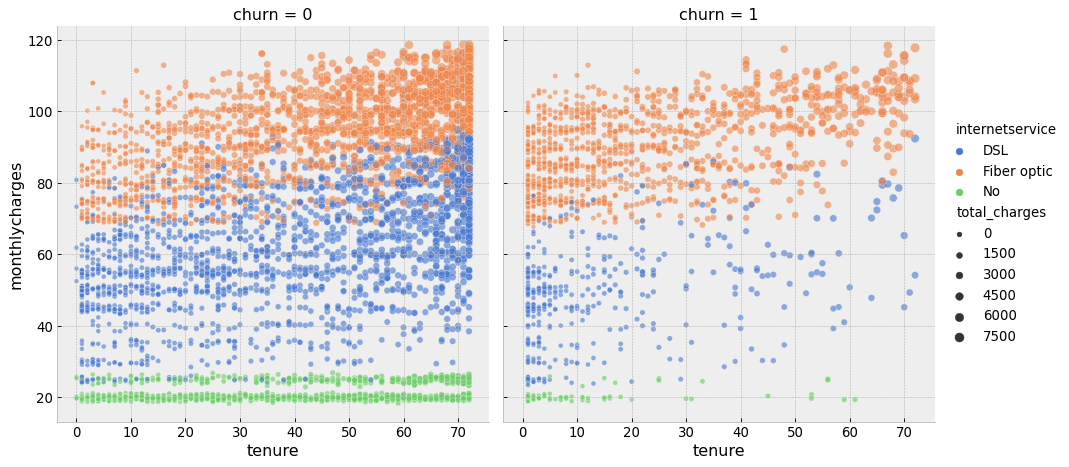

In [199]:
sns.relplot(x="tenure", y="monthlycharges", hue="internetservice", size="total_charges",alpha=.6,
            palette="muted",height=6, data=DB, col="churn")
plt.ylabel('Monthly Charges')

### Churned & No Churned subcribers By Serivce Type & Extra Service

Text(1060.0646871784982, 0.5, 'Monthly Charges')

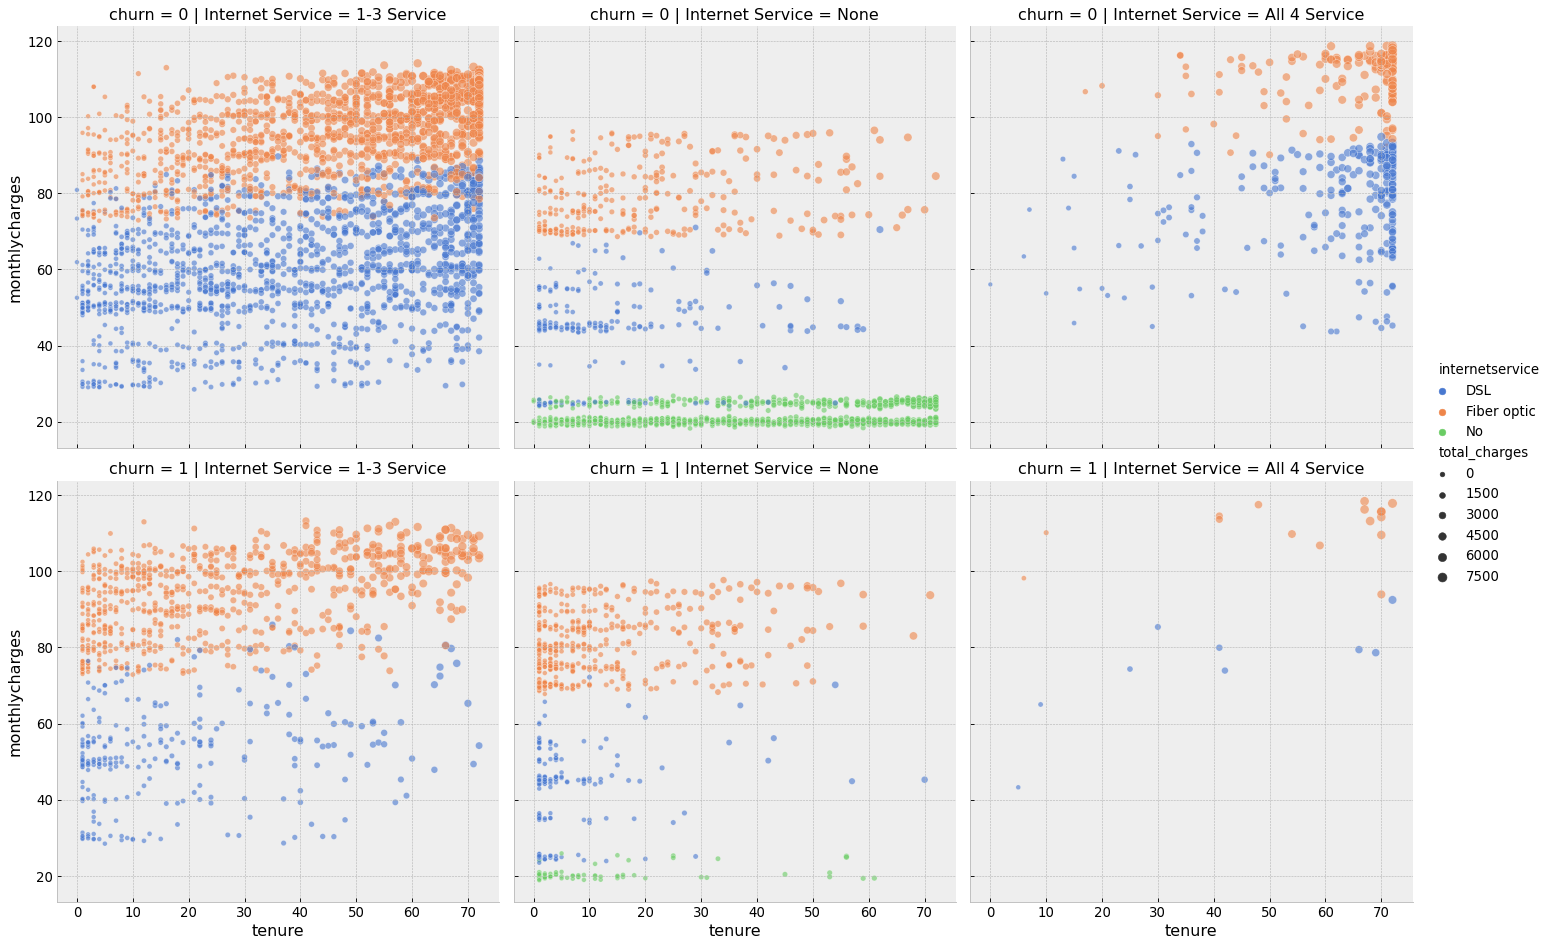

In [200]:
sns.relplot(x="tenure", y="monthlycharges", hue="internetservice", size="total_charges",alpha=.6,
            palette="muted",height=6, data=DB, row="churn", col='Internet Service')
plt.ylabel('Monthly Charges')

### Churned & No Churned subcribers By Serivce Type & Tenure

<AxesSubplot:xlabel='internetservice', ylabel='tenure'>

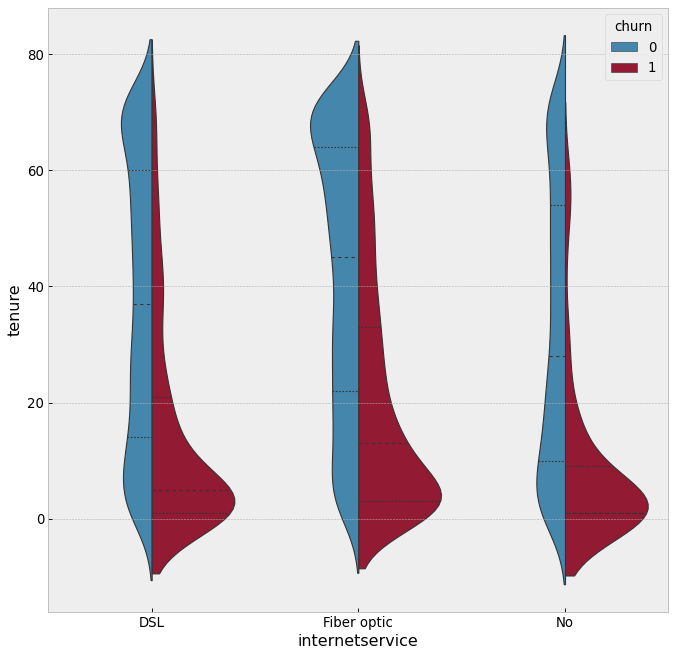

In [201]:
sns.violinplot(data=DB, x="internetservice", y="tenure", hue="churn",split=True, inner="quart", linewidth=1)

### Churned & No Churned subcribers By Month Charges, Tenure & Total Charges

In [202]:
G = DB[['churn','monthlycharges','tenure','total_charges']]

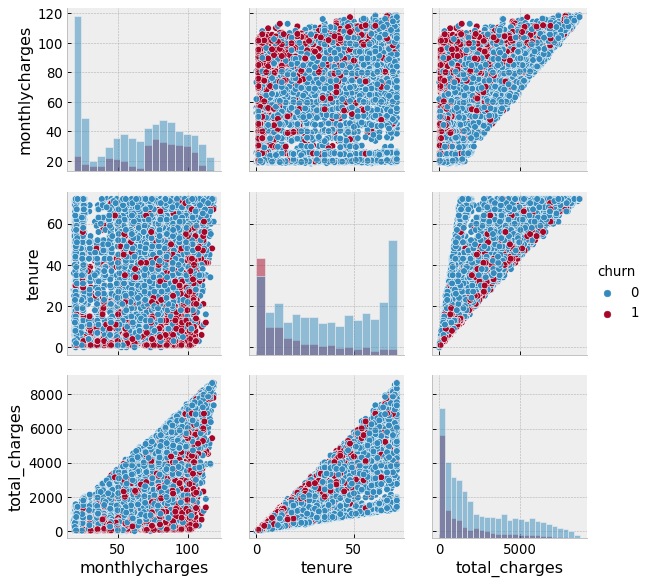

In [203]:
g = sns.PairGrid(G, hue="churn")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

_________________________________________________

# Supervised Learning

### Train and Test split

We have 7043 examples, we will use 1486 for test and the rest (5557) for train and split

we will use the following algorithms:
- Decision Tree
- Random Forest
- KNN

In [204]:
#New column= has internet servise
DB['has_internet_service'] = 0
DB.loc[(DB['onlinesecurity'] == 1) |
       (DB['onlinebackup'] == 1) |
       (DB['deviceprotection'] == 1) |
       (DB['techsupport'] == 1),'has_internet_service'] = 1

#new column= payment method is electronic check
DB['pay_electronic_check'] = 0
DB.loc[(DB['paymentmethod'] == 'Electronic check'),'pay_electronic_check'] = 1

#new column= contract is month-to-month
DB['cont_Monthly'] = 0
DB.loc[(DB['contract'] == 'Month-to-month'),'cont_Monthly'] = 1

#new column= new customer is 0-6 month in tenure group
DB['new_customer'] = 0
DB.loc[(DB['tenure_group'] == '0-6 Month'),'new_customer'] = 1

DB = DB.drop(['partner','dependents','tenure','multiplelines','onlinesecurity','onlinebackup','deviceprotection','techsupport','streamingtv','streamingmovies',
             'paperlessbilling','paymentmethod','contract','monthlycharges','total_charges','tenure_group','Internet Service','Customer Type'], axis=1)


In [205]:
DB = pd.get_dummies(DB) #get dummies
DB.head()

,customer_num,seniorcitizen,phoneservice,churn,has_internet_service,pay_electronic_check,cont_Monthly,new_customer,gender_Female,gender_Male,internetservice_DSL,internetservice_Fiber optic,internetservice_No,pricegroup_Extremely High,pricegroup_High,pricegroup_Low,pricegroup_Medium,Totalpricegroup_Extremely High,Totalpricegroup_High,Totalpricegroup_Low,Totalpricegroup_Medium
0,1,0,0,0,1,1,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0
1,2,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1
2,3,0,1,1,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0
3,4,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1
4,5,0,1,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [207]:
DB = DB.rename(columns={"internetservice_DSL":"DSL","internetservice_Fiber optic":"fiber_optic","gender_Female":"female","gender_Male":"male"})
pd.set_option('display.max_columns', None) 
DB

,customer_num,seniorcitizen,phoneservice,churn,has_internet_service,pay_electronic_check,cont_Monthly,new_customer,female,male,DSL,fiber_optic,internetservice_No,pricegroup_Extremely High,pricegroup_High,pricegroup_Low,pricegroup_Medium,Totalpricegroup_Extremely High,Totalpricegroup_High,Totalpricegroup_Low,Totalpricegroup_Medium
0,1,0,0,0,1,1,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0
1,2,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1
2,3,0,1,1,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0
3,4,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1
4,5,0,1,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7039,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1
7039,7040,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0
7040,7041,0,0,0,1,1,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0
7041,7042,1,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0


In [208]:
from sklearn.model_selection import train_test_split
test_size = 1486
train, test = train_test_split(DB, test_size=test_size, random_state=0, shuffle=True)

label = 'churn'
cust = 'customer_num' 

x_train = train.drop(label, axis=1)
x_train = x_train.drop(cust, axis=1) 
y_train = train[label]
cust_train = train[cust] 

x_test = test.drop(label, axis=1)
x_test = x_test.drop(cust, axis=1) 
y_test = test[label]
cust_test = test[cust] 

In [209]:
x_train.shape, y_train.shape, cust_train.shape, x_test.shape, y_test.shape, cust_test.shape

((5557, 19), (5557,), (5557,), (1486, 19), (1486,), (1486,))

## Decision Tree

In [210]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(x_train, y_train) 
y_test_pred_DecisionTree = clf.predict(x_test) 

output = pd.DataFrame({'customer_num': cust_test, 'churn_happened':y_test, 'churn_predicted': y_test_pred_DecisionTree}) 
output.to_csv('my_DecisionTree_Prediction.csv', index=False) 

In [ ]:

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

def plot_tree(tree, features, labels):
    graph = Source(export_graphviz(tree, feature_names=features, class_names=labels, filled = True))
    display(SVG(graph.pipe(format='svg')))

plot_tree(clf, x_train.columns, ['churned', 'not_churned'])

# Let's check the accuracy

In [211]:
from sklearn.metrics import accuracy_score 
np.around(accuracy_score(y_test, y_test_pred_DecisionTree), decimals=3, out=None)

0.769

__________________________________________________________________________

# Random Forest

In [212]:
from sklearn.ensemble import RandomForestClassifier 

model = RandomForestClassifier(n_estimators=79, max_depth=3, random_state=1)

model.fit(x_train, y_train) 

y_test_pred_RandomForest = model.predict(x_test) 


output = pd.DataFrame({'customer_num': cust_test, 'churn_happened':y_test, 'churn_predicted': y_test_pred_RandomForest}) 
output.to_csv('my_RandomForest_Prediction.csv', index=False) 

In [213]:
feature_importances = model.feature_importances_
features = x_train.columns 
stats = pd.DataFrame({'feature':features, 'importance':feature_importances}) 
stats.sort_values('importance', ascending=False)

,feature,importance
4,cont_Monthly,0.347360
3,pay_electronic_check,0.152315
9,fiber_optic,0.134794
17,Totalpricegroup_Low,0.093881
10,internetservice_No,0.072290
2,has_internet_service,0.047404
12,pricegroup_High,0.036018
8,DSL,0.027236
13,pricegroup_Low,0.026276
15,Totalpricegroup_Extremely High,0.024958


# Let's check the accuracy

In [214]:
np.around(accuracy_score(y_test, y_test_pred_RandomForest), decimals=3, out=None)

0.767

______________________________________________________________________________

# KNN - K Nearest Neighbors

In [215]:
from sklearn.neighbors import KNeighborsClassifier  

clf = KNeighborsClassifier(n_neighbors=3)
        
clf.fit(x_train, y_train) 

y_test_pred_Knn = clf.predict(x_test) 

output = pd.DataFrame({'customer_num': cust_test, 'churn_happened':y_test, 'churn_predicted': y_test_pred_Knn}) # saving results to DataFrame
output.to_csv('my_Knn_Prediction.csv', index=False)

# Let's check the accuracy

In [216]:
np.around(accuracy_score(y_test, y_test_pred_Knn), decimals=3, out=None)

0.755

<br>

# conclusion
### we get the highest accurancy by the "Decision Tree" algorithm - 76.9%

____________________________________________________________________________________________

# Overfitting

<br>

## we need to improve our models 

In [217]:
## Decision Tree - optimazed accurancy by optimal max_depth
i=1
test_acc =0
max_depth=0

while i<100:
    clf = DecisionTreeClassifier(max_depth=i)
    clf.fit(x_train, y_train)
    y_test_pred_DecisionTree = clf.predict(x_test)
    if test_acc < accuracy_score(y_test, y_test_pred_DecisionTree):
        test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
        max_depth=i
    i+=1

output = pd.DataFrame({'customer_num': cust_test, 'churn_happened':y_test, 'churn_predicted': y_test_pred_DecisionTree}) 
output.to_csv('my_opt_DecisionTree_Prediction.csv', index=False) 
    
print("The optimal max_depth is: " +str(max_depth)+' and the best accurancy of "Decision Tree" algorithem is: '+str(np.around(test_acc, decimals=3, out=None)*100)+" %")

The optimal max_depth is: 8 and the best accurancy of "Decision Tree" algorithem is: 77.9 %


In [218]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(x_train, y_train) 
y_test_pred_DecisionTree = clf.predict(x_test) 


def plot_tree(tree, features, labels):
    graph = Source(export_graphviz(tree, feature_names=features, class_names=labels, filled = True))
    display(SVG(graph.pipe(format='svg')))


plot_tree(clf, x_train.columns, ['churned', 'not_churned'])

NameError: name 'Source' is not defined

In [223]:
### Random Forest
i=[5,11,25,31,53,107,151,203]
j=[2,3,5,6,7,8,20,100]
op_n_estimator=0
op_max_depth=0
test_acc =0

for k in i:
    for m in j:
        model = RandomForestClassifier(n_estimators=k, max_depth=m, random_state=1)        
        model.fit(x_train, y_train)
        y_test_pred_RandomForest= model.predict(x_test)
        if test_acc < accuracy_score(y_test, y_test_pred_RandomForest):
            test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
            op_n_estimator=k
            op_max_depth=m
        
    
print("The optimal n_estimators is: " +str(op_n_estimator)+' and the max_depth is: '+str(op_max_depth)+' and the best accurancy of "Random Forest" algorithem is: '+str(np.around(test_acc, decimals=3, out=None)*100)+" %")

The optimal n_estimators is: 5 and the max_depth is: 7 and the best accurancy of "Random Forest" algorithem is: 78.7 %


In [220]:
output =pd.DataFrame({'customer_num': cust_test, 'churn_happened':y_test, 'churn_predicted': y_test_pred_RandomForest}) 
output.to_csv('my_opt_RandomForest_Prediction.csv', index=False) 

In [221]:
#KNN

from sklearn.preprocessing import StandardScaler # import the libraries

i=1
op_n_neighbors=0
test_acc=0

scaler = StandardScaler() # define

x_train_scaled = scaler.fit_transform(x_train) # Fit to data, then transform it.
x_test_scaled = scaler.transform(x_test) # Perform standardization by centering and scaling


y_test_pred_Knn_Scaled = clf.predict(x_test_scaled)

while i<=100:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(x_train_scaled, y_train)
    y_test_pred_Knn_Scaled = clf.predict(x_test_scaled)
    if test_acc < accuracy_score(y_test, y_test_pred_Knn_Scaled):
        test_acc = accuracy_score(y_test, y_test_pred_Knn_Scaled)
        op_n_neighbors=i
    i+=1

    
output = pd.DataFrame({'customer_num': cust_test, 'churn_happened':y_test, 'churn_predicted': y_test_pred_Knn_Scaled}) 
output.to_csv('my_Knn_Prediction.csv', index=False)

print("The optimal n_neighbors is: " +str(op_n_neighbors)+' and the best accurancy of "KNN" algorithem is: '+str(np.around(test_acc*100, decimals=3, out=None))+" %")

The optimal n_neighbors is: 81 and the best accurancy of "KNN" algorithem is: 78.668 %


## OUR BENCHMARK MODEL

### our benchmark model will be the most common label in the train set

In [222]:
y_train.value_counts()

0    4075
1    1482
Name: churn, dtype: int64

In this case it's 0 (not churned), let's check its performance on both train and test
<br>

In [224]:
def get_benchmark_predictions(x, benchmark_value): # The function returns a numpy array on the same length as x with all values equal to benchmark_value
    return np.ones(len(x))*benchmark_value
    

benchmark_value = 0

y_test_pred_Benchmark = get_benchmark_predictions(x_test, benchmark_value)
y_test_pred_Benchmark
# Basicly, our benchmark predicts, always 0 (zero) --> Not churned

np.around(accuracy_score(y_test, y_test_pred_Benchmark), decimals=3, out=None)

0.74

_________________________________________________________

## Our model results:
Decision tree best accuracy Result: 77.9 %<br>
Random Forest best accuracy Result: 78.7 %<br>
Knn best accuracy Result (after standardization): 78.668 %<br>
## The performance on test is 74 %, so we can see that any of our algorithms beat the benchmark performance